# Задание 3

## Описание

По данным VegStNx.csv пострить LDA классификатор, попробовать сократить количество используемых фичей.

## Подготовка

In [5]:
import itertools
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv('VegStNx.csv', index_col=0)

In [7]:
X = df.loc[:, 'латеральные.отделы.префронтальной.коры.справа':]
y = df['Class']

## Решение

In [16]:
def get_accuracy(confusion_matrix):
    return np.trace(confusion_matrix) / np.sum(confusion_matrix)
     

def plot_heatmap(
        *,
        matrix,
        classes,
        x_title='pred',
        y_title='gt'
):
    fig = ff.create_annotated_heatmap(matrix, x=classes, y=classes, colorscale='thermal')
    fig.update_xaxes(title=x_title, side='top', scaleanchor='y', constrain='domain')
    fig.update_yaxes(title=y_title, scaleanchor='x', autorange = "reversed")
    
    return fig

#### 1. Использование всех фичей

Accuracy: 0.9038461538461539


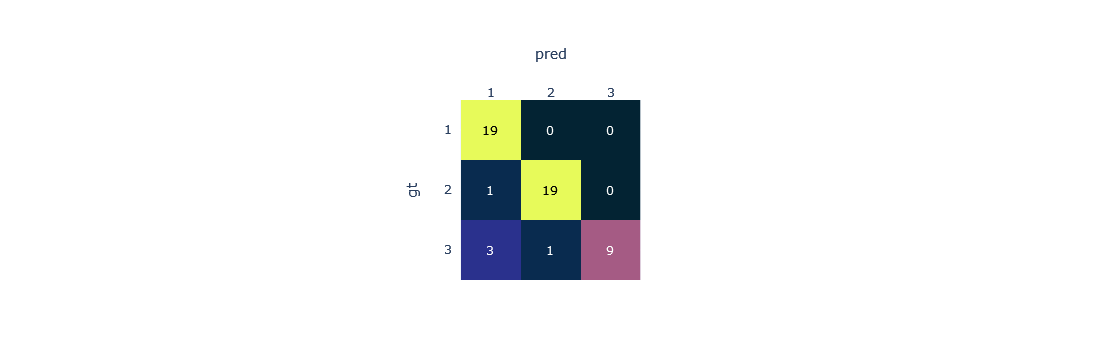

In [17]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

conf_matrix = confusion_matrix(y_true=y, y_pred=clf.predict(X))

print(f'Accuracy: {get_accuracy(conf_matrix)}')
plot_heatmap(matrix=conf_matrix, classes=clf.classes_.tolist())

#### 2. Использование меньшего количества фичей

In [10]:
correlation = X.corr()

# определим фичи с корреляцией > 0.9
for index in range(len(correlation)):
    for column in range(index + 1, len(correlation)):
        if abs(correlation.iloc[index, column]) >= 0.9:
            print(f'({index}, {column}) -- {round(correlation.iloc[index, column], 3)}')

(1, 3) -- 0.903
(1, 15) -- 0.914
(10, 16) -- 0.936
(13, 15) -- 0.911


In [22]:
# попробуем обучиться, исключая различные комбинации найденных фичей
column_number = [1, 3, 10, 13, 15, 16]

results = {}
for l in range(1, len(column_number) + 1):
    for subset in itertools.combinations(column_number, l):
        reduced_X = X.drop(X.columns[list(subset)], axis=1)
        clf.fit(reduced_X, y)
        conf_matrix = confusion_matrix(y_true=y, y_pred=clf.predict(reduced_X))
        results[subset] = get_accuracy(conf_matrix)

dict(itertools.islice(sorted(results.items(), key=lambda item: item[1], reverse=True), 20))

{(1,): 0.9038461538461539,
 (16,): 0.9038461538461539,
 (15, 16): 0.9038461538461539,
 (1, 16): 0.8846153846153846,
 (3, 10): 0.8846153846153846,
 (3, 16): 0.8846153846153846,
 (10, 16): 0.8846153846153846,
 (3,): 0.8653846153846154,
 (10,): 0.8653846153846154,
 (15,): 0.8653846153846154,
 (1, 3): 0.8653846153846154,
 (1, 10): 0.8653846153846154,
 (3, 15): 0.8653846153846154,
 (10, 15): 0.8653846153846154,
 (1, 3, 16): 0.8653846153846154,
 (3, 15, 16): 0.8653846153846154,
 (10, 15, 16): 0.8653846153846154,
 (13,): 0.8461538461538461,
 (1, 13): 0.8461538461538461,
 (1, 15): 0.8461538461538461}

Accuracy: 0.8653846153846154


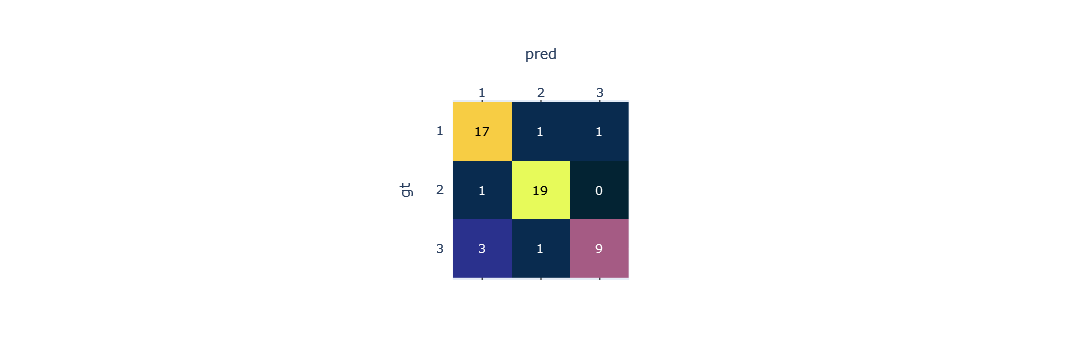

In [18]:
columns_to_drop = X.columns[[1, 3, 16]]
reduced_X = X.drop(columns_to_drop, axis=1)

clf.fit(reduced_X, y)

conf_matrix = confusion_matrix(y_true=y, y_pred=clf.predict(reduced_X))

print(f'Accuracy: {get_accuracy(conf_matrix)}')
plot_heatmap(matrix=conf_matrix, classes=clf.classes_.tolist())